# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
import seaborn as sb
from IPython.display import display # Allows the use of display() for DataFrames

np.random.seed(42) # To make results reproducable

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset

display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17623,4280,7305,2279,960,2616
1,1182,3088,6114,978,821,1637
2,11170,10769,8814,2194,1976,143


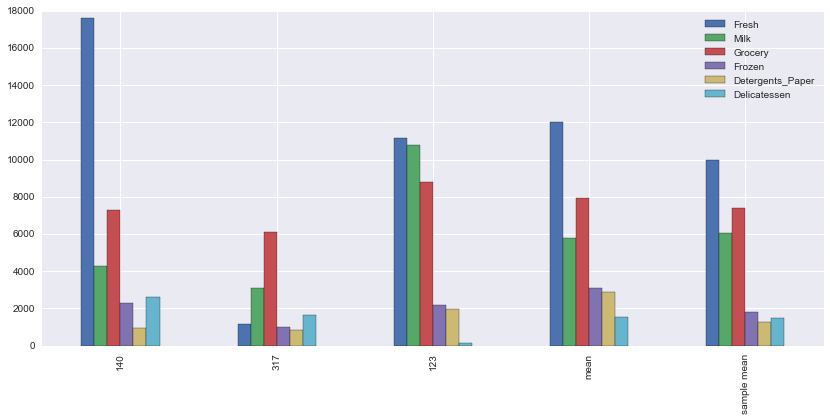

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
# Simple Random Sampling - http://stattrek.com/sampling/populations-and-samples.aspx
# http://stattrek.com/statistics/random-number-generator.aspx ( selected 9 values with in 440 to 0, seed 42)
#  Out of 9 random samples, I have found following 3 which look a bit different with less common traits.
indices = [ 140, 317, 123 ]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

samples_bar = samples.append(data.describe().loc['mean']).append(samples.describe().loc['mean'])
samples_bar.index = indices + ['mean', 'sample mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6))

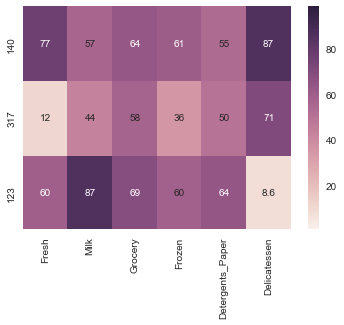

In [4]:
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)
# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)
# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]
# Now, create the heat map using the seaborn library
_ = sb.heatmap(percentiles, vmin=1, vmax=99, annot=True)

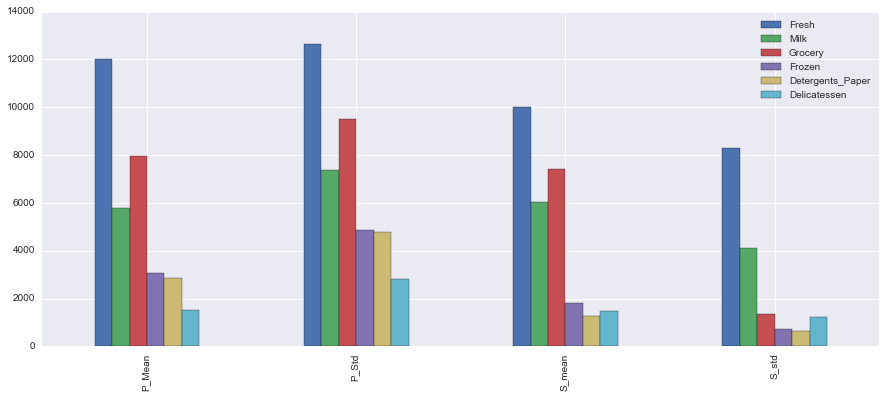

In [5]:
# Data & Sample - mean & std
_ = data.describe().loc[['mean', 'std']]
_ = _.append( samples.describe().loc[['mean', 'std']] )

# P-Population, S-Sample
_.index = ['P_Mean', 'P_Std', 'S_mean', 'S_std']
_ = _.plot(kind='bar', figsize=(15, 6))

In [6]:
display(samples)
# convert values to percentages based on a Customers Total purhcase value 
display((100. * samples.T/samples.sum(axis=1))) # .T)
# caliculation totals for each category
display(samples.sum(axis=1))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17623,4280,7305,2279,960,2616
1,1182,3088,6114,978,821,1637
2,11170,10769,8814,2194,1976,143


,0,1,2
Fresh,50.260959,8.552822,31.854218
Milk,12.206600,22.344428,30.710660
Grocery,20.833928,44.240232,25.135459
Frozen,6.499729,7.076700,6.256773
Detergents_Paper,2.737929,5.940666,5.635088
Delicatessen,7.460856,11.845152,0.407802


0    35063
1    13820
2    35066
dtype: int64

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Customer 0, I think this customer could be a supermaket that specilises mainly for Fresh products, but also sells other products. I think Customer 0 could be a Vegitables Supermarket store which is performing good sales in Fresh products. While Frozen, Grocery, Milk and Delicatessen are sold nearly equal amounts but all these combines performance(income) is less than Fresh products.

I think Customer 2 could also be a General Store store that sells good amount Fresh products and also fair amount of Milk and Frozen products. I think this shows that this store focuses more on regularly used products while this sell amount of Detergents_paper and Delicatessen.

Customer 1, could be a Coffee House given its high consumpution of Grocery, Milk and Detergents_Paper. As Grocery could also include items like Coffee and Milk & Detergent_Paper are already in high consupmtion support the same.

Looking at the statistical description, one common thing we can observe is that there are big differences between min, mean, median & max.  If we had to put ranking for each category wise based on the income generated, then first 4 of my choises will be Fresh, Grocessary, Milk and Frozen. We observe this from both total generated from Samples as well as from display of data. I have choosen samples based on the customer spenditure on specific category like Customer 0 - spends more on Fresh while Customer 1 - spends more on Grocery while Customer 2 felt like a combination of first two. Also, for each customer 70-80% of cost is from 3 of above mentioned 4 categories only.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for rem_col in data.columns:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = pd.DataFrame.copy(data)
    pred_target = new_data[rem_col]
    new_data = new_data.drop([rem_col], axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, pred_target, test_size=.25, random_state=12)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    
    print score, rem_col

-0.432144337322 Fresh
0.297312468004 Milk
0.762223478008 Grocery
-4.66188971717 Frozen
0.844718962979 Detergents_Paper
-4.56870171573 Delicatessen


In [8]:
rem_col = 'Fresh'
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = pd.DataFrame.copy(data)
pred_target = new_data[rem_col]
new_data = new_data.drop([rem_col], axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, pred_target, test_size=.25, random_state=12)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print score, rem_col

-0.432144337322 Fresh


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

- Which feature did you attempt to predict?
After Question1, I got interested to more know about Fresh, Grocery and Milk. So I ran the experiment of modeling with n-1 features and last feature for predicting.
- What was the reported prediction score?
Reported prediction score is -0.432144337322 for Fresh.
- Is this feature is necessary for identifying customers' spending habits?
Yes, understanding the Fresh might help in identifying customers' spending habits. As shown below, Fresh is the top expenditure from our data.

In [9]:
# Category wise distribution
tmp = data.T.sum(axis=1)

display(tmp * 100/ tmp.sum())

Fresh               36.117042
Milk                17.444899
Grocery             23.930791
Frozen               9.245528
Detergents_Paper     8.672369
Delicatessen         4.589370
dtype: float64

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

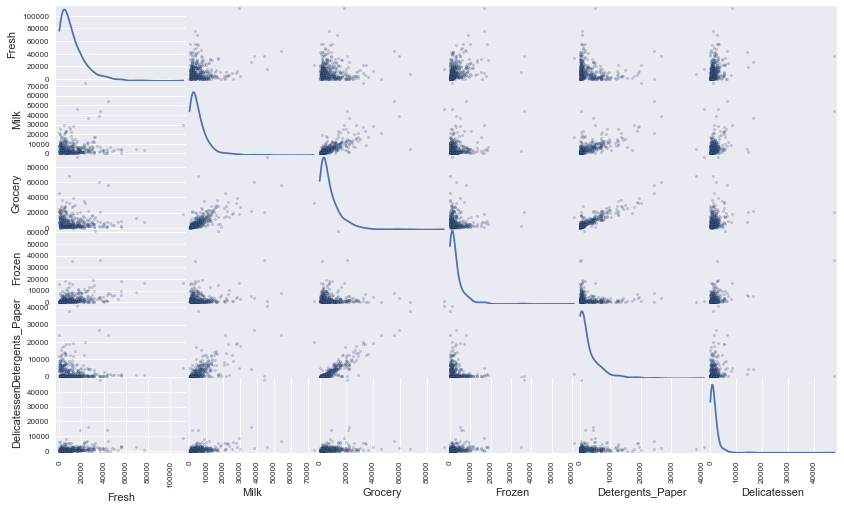

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**


- Are there any pairs of features which exhibit some degree of correlation?

Yes, we can see that Detergents_Paper & Grocery shows some degress of correlation. Also, Milk seems show a bit correlation with Detergents_Paper and Grocery.

- Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict?

Yes, this also confirms our understanding why scores of Milk, Delicatessen and Frozen are -tive and other features are postive. 

For Category - Milk, the data seems to have a some what spread but if we cleanse data then we might be able to get clear picture for stronger correlation. For Cateogry - Delicatessen, the plots looks like most a rectangle/circle - showing some what independence from the rest of the features. Frozen data is also somewhat seems like Delicatessen, independent of other features but show some spread of data or these could be lots of outliers.

- How is the data for those features distributed?

As mentioned in earlier in statistical distribution, we see big differences between min, max, mean, median from and here in this graph we can observe that. Distribution plots in the diagonal line of above scatter matric, shows that all the columns/features data looks right skewed higher kurtosis distributions. But unlike rest, Delicatessen seem to have much smaller tail. Even though much data is not in the distribution's tails, but due to extended lengths I think due to presence of having outliers our distributions could look more skewed.

If clean data, we might able to able to improve our understanding/score for Fresh and Milk and we are already having good scores for Detergent_Paper and Grocery.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

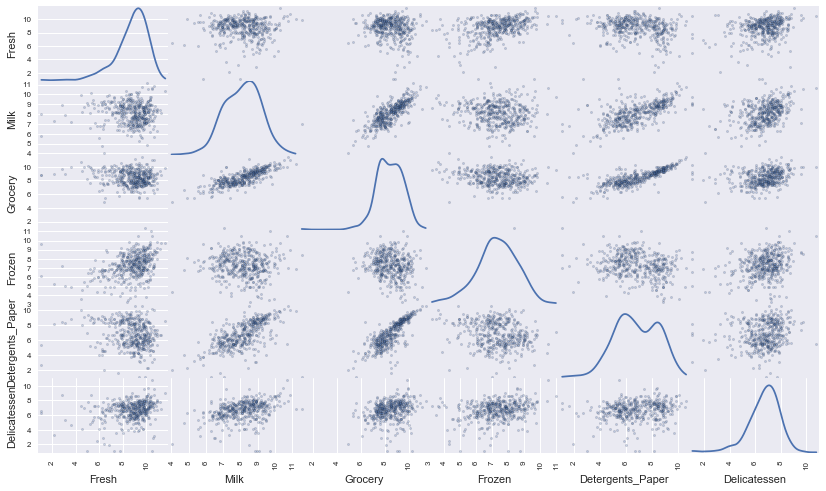

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(pd.DataFrame.copy(data))

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(pd.DataFrame.copy(samples))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.776960,8.361708,8.896314,7.731492,6.866933,7.869402
1,7.074963,8.035279,8.718337,6.885510,6.710523,7.400621
2,9.320987,9.284427,9.084097,7.693482,7.588830,4.962845


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
outliers_ids = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers_ids += list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [86, 98, 154, 356] + [ 65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [14]:
from collections import Counter
repeated_outliears =  [(x, y) for (x,y) in Counter(outliers_ids).iteritems() if y > 1]
repeated_outliears.sort( key=lambda (x,y): y, reverse=True)

print 'Outliear records repeated more than once',repeated_outliears
print 'Number of outliear records, that are opted to ignore:', len(outliers), len(outliers) * 100./len(data),'%'

Outliear records repeated more than once [(154, 3), (128, 2), (65, 2), (66, 2), (75, 2)]
Number of outliear records, that are opted to ignore: 20 4.54545454545 %


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, record ids like 128, 154, 75, 66 & 65 seems to have repeated more than once.

As explained earlier, I believe removing outliers in Fresh & Milk might help to generated better results for predicting these. So, I have updated outlier variable specific to these column's outliears. While we can also remove other variables outlier but it would be loss of the data.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

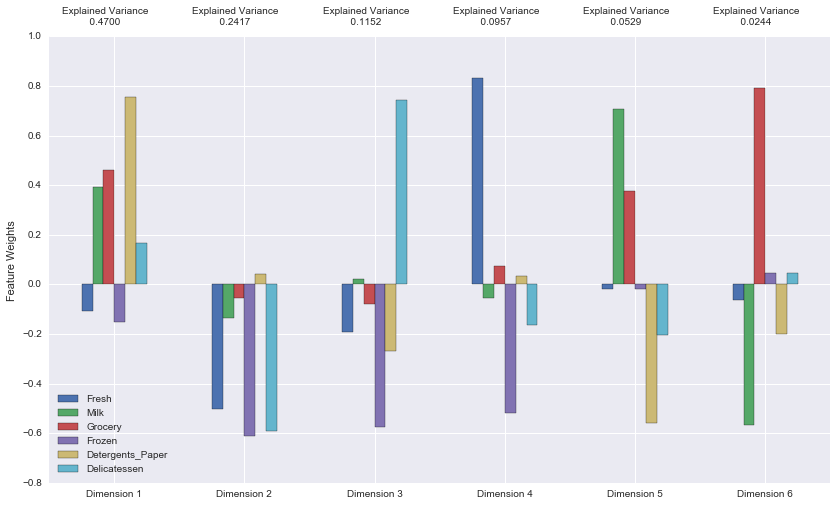

In [15]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

About 71% (47+24) of variance is explained by the first and the second principle component. With the help of first 4 principles componenets, about 92% of variance is explained (implies, With the addition of 3rd and 4rd dimension there is +21% improvement).

As we can see first principle component explains 47% variance of which has strong postive weights for Detergents_paper, Grocery & Milk. I think the first dimension explain more about Grocery Store & Cofe House. Where as second principle component seems like compelete opposite of first, holding negitive but stronger weights for Fresh, Frozen and Delicatessen. In terms of customer spending this second dimension explains more about Vegitable Supermarket. (Strong weight implies, in the graph the feature weights are near to .5 or more than .5)

Unlike the first 2 principle components, I feel that remaining components are more look like specialised to describle a category. 3rd Components holds strong weights for (postive weight)Delicatessen and (Negitive Weight)Frozen. Simmilarly, 4th component has stronger weights for (postive weight)Fresh and (negitive weight)Frozen. I think 3rd and 4th dimension explains customer 1(Coffe House) and customer 0(Supermarket) of sample.

In [16]:
sam =  pca.explained_variance_ratio_
print sum(sam[:2])
print sum(sam[:4])

0.711726430483
0.922662832183


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.4281,-1.3975,0.4201,0.3613,0.0289,0.2426
1,0.4394,0.8061,1.1316,-1.3707,-0.0215,0.4275
2,0.9981,0.4702,-1.8151,0.4708,0.9492,-0.3873


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.4281,-1.3975
1,0.4394,0.8061
2,0.9981,0.4702


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

Advantages of K-Means Clustering:
* Simper Hypothesis to understand and also runs faster(than hirearical clustering)
* Produces tighter cluster and provides better results when data set is distinctly seperated.

Advantages of Gaussian Mixture Model:
* Takes advantages of some hidden, not observable parameters
* No fixed categorisation of groups but instead assigns probabilities
* Generates Non convlex clusters which can be controlled with variance of distribution

I would K means cluster given its simplicity & speed.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For future analysis
KMM_Centers = []

# Testing each category
for i in range(2,25):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(init='k-means++', n_clusters=i, n_init=10)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_
    
    KMM_Centers.append(centers)

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print i, score

2 0.430091705015
3 0.34996077194
4 0.339988663628
5 0.348465784003
6 0.354824857435
7 0.364019881407
8 0.360346212442
9 0.362271435332
10 0.345953416223
11 0.347541358681
12 0.351311538463
13 0.349650568055
14 0.352558524014
15 0.347801121424
16 0.354059616567
17 0.351416448709
18 0.361668899463
19 0.345195720222
20 0.350582832344
21 0.337836486629
22 0.343280437319
23 0.344637178754
24 0.351342175915


In [21]:
## Experiment with GMM ###

from sklearn.mixture import GMM

# For future analysis
GMM_Centers = []

for i in range(2, 10):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=i, random_state=42)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    GMM_Centers.append(clusterer.means_)

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)

    print i, score

2 0.420707590921
3 0.344796104774
4 0.319823411565
5 0.282249846833
6 0.316610083407
7 0.314243292641
8 0.338021804868
9 0.283619555899


In [22]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(init='k-means++', n_clusters=2, n_init=10)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

In [23]:
print centers
print score

[[ 2.12709774  0.19600132]
 [-1.44642646 -0.1332809 ]]
0.430091705015


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

Silhouette score with two K means clusters is 0.43. 

As number of clusters were increased from 2, then these scores were kind of fluctuating in between .34 to .37

(Given the dataset size and dimension, K mean is the first choise I have but also tried to verify the K Mean is better choise by trying GMM. As surprising as it, K means seem to have performed slightly better than GMM.)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

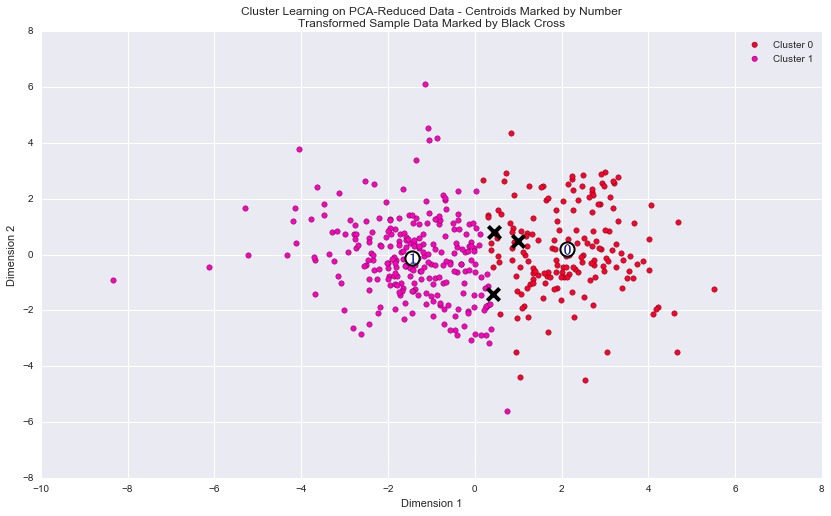

In [24]:
rs.cluster_results(reduced_data, preds, centers, pca_samples)

## GMM vs KMeans

Trying to see how GMM and KMean represent the data when 

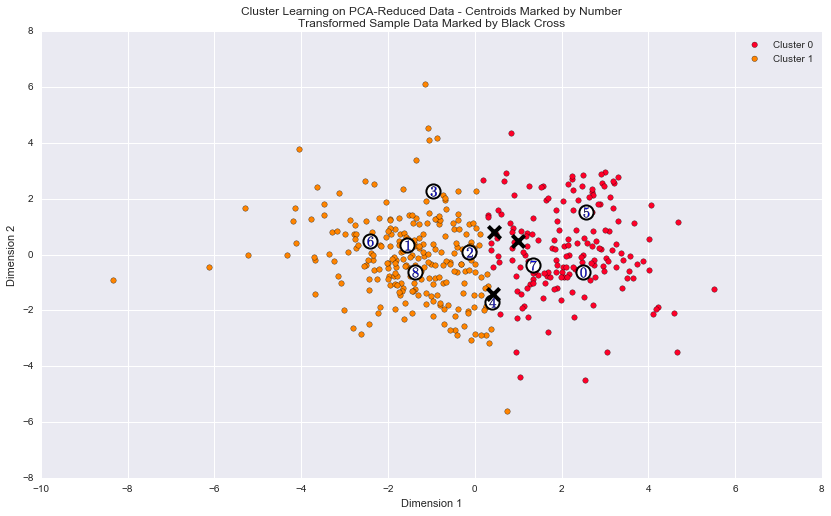

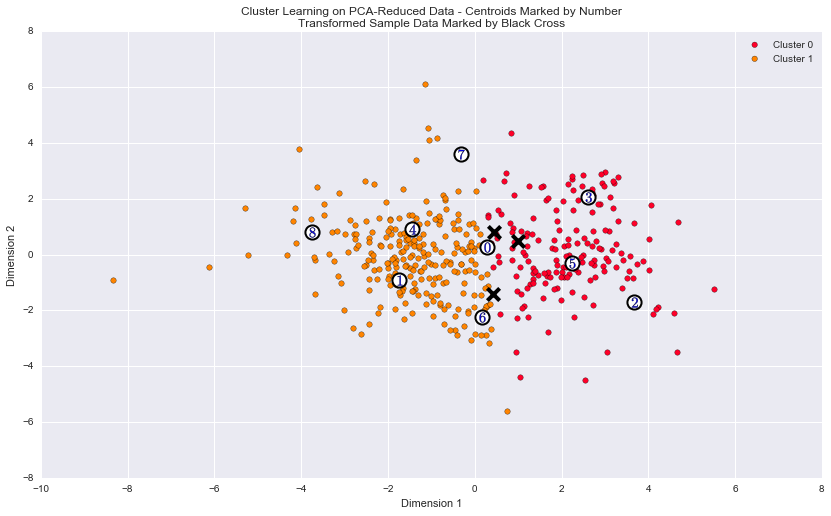

In [25]:
show_clusters  = 9

rs.cluster_results(reduced_data, preds, GMM_Centers[show_clusters - 2], pca_samples)

rs.cluster_results(reduced_data, preds, KMM_Centers[show_clusters - 2], pca_samples)

One observation, I see when I place 9 clusters centers for both KMean and GMM is that both looks almost same(see point 6th center positing for difference), but the starting points center points are different.

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [26]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5363.0,7635.0,12002.0,1017.0,4370.0,1042.0
Segment 1,9299.0,1959.0,2347.0,2124.0,290.0,702.0


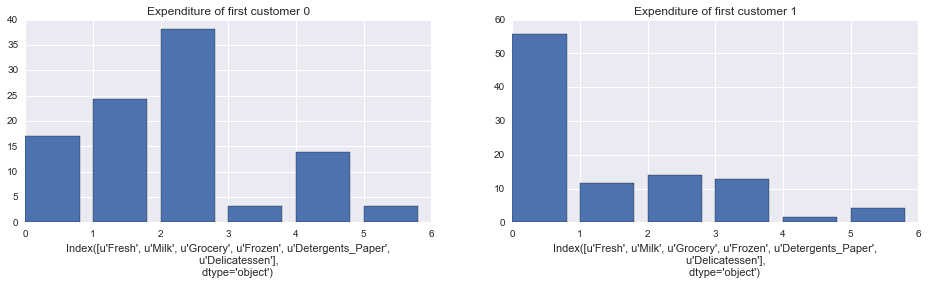

In [27]:
import matplotlib.pyplot as plt
x = true_centers.columns
y1 = true_centers.iloc[0]
y2 = true_centers.iloc[1]
plt.figure(1, figsize=(16, 8))
plt.subplot(221)
plt.xlabel(x)
plt.bar(range(len(y1)), 100* y1/sum(y1))
sam = plt.title('Expenditure of first customer 0')
plt.subplot(222)
plt.bar(range(len(y2)), 100 * y2/sum(y2))
plt.xlabel(x)
sam = plt.title('Expenditure of first customer 1')

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

First instance I noted about two categories of customers is
* Category 1: Customers who spend nearly 40% of their money on Grocery alone and around 80% along with Milk and Fresh. (Reminds me of the General Stores category we initiall thought of)
* Category 2: Customer who spend around 50% on Fresh alone and around 10+% each on Milk, Grocery and Frozen. (Vegitable Super Markets)

One common features between both categories is that both prefer less Delicatessen. We initially thought that there could be a category called Coffee House, but we dont see another category/cluster. So I think, the sample set we took has this specially found case or this Coffee House behavir is so minor it could be included in General Store group.

For Frozen and Detergents_Paper, holds a bit inverse rules for these two category. While Category customer 1, prefer high Detergent_paper and less Frozen then other prefers vice versa.

In [28]:
display(100 * true_centers.T/ true_centers.sum(axis=1)) 

,Segment 0,Segment 1
Fresh,17.063858,55.612703
Milk,24.292851,11.715806
Grocery,38.187661,14.036242
Frozen,3.235865,12.702590
Detergents_Paper,13.904356,1.734346
Delicatessen,3.315409,4.198313


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [29]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In [30]:
sam = data.iloc[[0,1,2]]
display(100 * sam.T/sam.sum(axis=1))

,0,1,2
Fresh,37.139423,21.213852,17.353182
Milk,28.306754,29.489569,24.059000
Grocery,22.165220,28.762099,20.988801
Frozen,0.627345,5.296699,6.569243
Detergents_Paper,7.838884,9.898996,9.603933
Delicatessen,3.922373,5.338784,21.425840


**Answer:**

Yes, I find that customer preferences are almost consistant. Sample Customer 0 who spent major share on Fresh is in one category while Customer 1 who spends more in Grocery, Milk, Fresh in another.

For customer 3, this seems kind of intermediate one between above and also higher purchase of Delicatessen show that this is a special case. Here, unlike customer 0 or customer 1 expenditure is spend more on Milk, Grocery, Delicatessen. Our rule of thumb fails, so I would depend on above clustering algorithmn itself. 

## Conclusion

### Question 10
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether that change affects its customers positively or negatively. The wholesale distributor wants to consider changing its delivery service from 5 days a week to 3 days a week, but will only do so if it affects their customers positively. *How would you use the customer segments you found above to perform an A/B test for this change?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

A/B Test is a way of comparing two versions(say A and B) by showing it to simmilar customers at the same time. The test A or B with better conversion rate will be finalised. In our case, the conversion rate is the customer satisfaction or negitive of how many customers found trouble with the change of our service from A to B.

Lets say,
 * A refers: 5 days per week
 * B refers: 3 days per week

From unsupervised learning we have understood that there are 2 main categories of customers. So understanding customers is same as understand these clusters behaviors.

When it comes to shopping, if see the general procedure a customer follow is that first he selects items then either at billing stage or just before billing/checkout, they need to check for our A/B service. This gives a short times gap where can quickly identify the customer category group and show him to either A or B service. Thus we can do AB Experiment for check this service.

As we have got 2 difference clusters and 2 version(AB test), so total 4 groups. While A service is already use, this makes our control group and B service becomes our variation group.

[Experiment for sample, A - control group, B - variation group]
* A test on cluster 1 customers
* B test on cluster 1 customers
* A test on cluster 2 customers
* B test on cluster 2 customers

[Post Experiment] We will check the total sales or post checkout customer satisfaction feedback and compare results(& feedback) between the control groups and variation groups. In our cases if we see any decline in sales with B test in a cluster, this imples our new service impacts this cluster of customers. This ways, we get to understand which cluster gets effected most by B service or will this effect both the customer types equally.

In [31]:
print true_centers.sum(axis=1)

Segment 0    31429.0
Segment 1    16721.0
dtype: float64


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a segment it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and has made estimates for each customer's annual spending of the six product categories. Knowing these estimates, the wholesale distributor wants to classify each new customer to one of the customer segments to determine the most appropriate delivery service.  
*Describe a supervised learning strategy you could use to make classification predictions for the ten new customers.*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer**

In general statistics, it is known that more data is always good as we might get more valuble information in it. But, in supervised(machine) learning we have something called **curse of dimensionality** 

![Sparsity becomes exponentially worse as dimension increases](https://i.ytimg.com/vi/QZ0DtNFdDko/maxresdefault.jpg)

Also **Ockhams Razor rule** tell us that simpler models are better. So if we have **FEW** important features which can explain the hidden structures with in data(features with more information gain), then our model does not have to do ground work to identify those important details and this will help us build a good simpler model.

If we recall, one of the objectives of using a **unsupervised machine learning** is to model the underlying structure or distribution in the data in order to learn more about the data. One such meathod is **clustering**, where you want to discover the inherent groupings in the data, such as *grouping customers by purchasing behavior.*

This is exactly we are trying to do here in customer segments also. We are first using an unsupervised learning model to find the hidden details like customer_segment feature and then adding this details as a new dimension.

Now our machine learning models can quickly learn this concept that there are two main types of categories of customer, one is the group that consumes lots of Fresh and other group focuses on Grocery, Milk and others.

--

I believe having these feature might help us with to train our algorithm faster
* Total money spent ### [feasible with existing data]
* percentages of money spent for each category ### [feasible with existing data]
* Total time spent during shopping
* Time spent of different categorys/department of products
* Suggestion for relative produts/offers
* Transportation requirements
* Geographic Location, Weather and other Calenderic details like customer arrial & billing's Datetime, month, weekday, holiday details.

### Visualizing Underlying Distributions
At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [32]:
help(rs)

Help on module renders:

NAME
    renders

FILE
    /Users/sampathkumarm/Desktop/devbox/Sam-DS/Kaggle/machine-learning/projects/creating_customer_segments/renders.py

FUNCTIONS
    channel_results(reduced_data, outliers, pca_samples)
        Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
        Data is labeled by "Channel" and cues added for student-selected sample data
    
    cluster_results(reduced_data, preds, centers, pca_samples)
        Visualizes the PCA-reduced cluster data in two dimensions
        Adds cues for cluster centers and student-selected sample data
    
    pca_results(good_data, pca)
        Create a DataFrame of the PCA results
        Includes dimension feature weights and explained variance
        Visualizes the PCA results




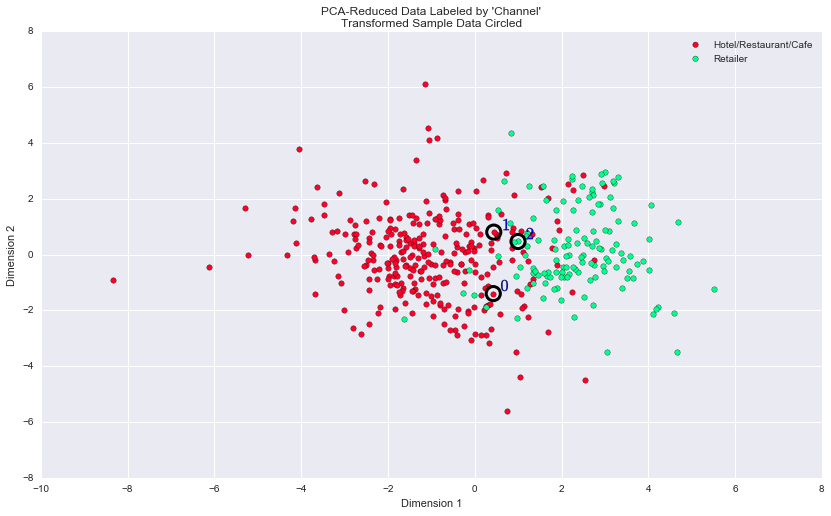

In [33]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

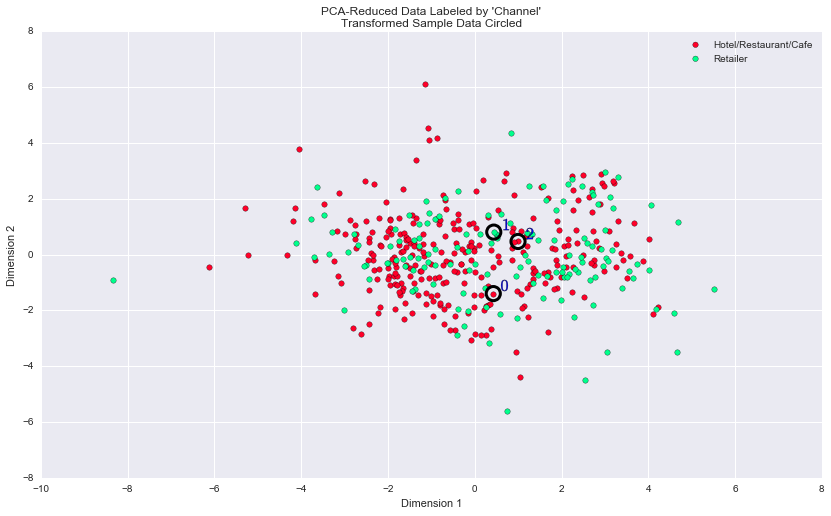

In [34]:
rs.channel_results(reduced_data, [], pca_samples) # outliers are set as empty list

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

Only 2 clusters were choosen for our Clustering algorithm, which has silhouette score of .43 There are some data points ~20 green point in red region and ~30 red points in green region. With 440 records, this classificaiton is doing good.

Not a pure classificaiton but we can say, we are doing fair job at classification. Majority of red dots are bit distant from center for red dot.

Yes, this distribution is fairly consistency with prior reduced_data classification.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.